# Aula 1

## Carregando os dados

In [1]:
import pandas as pd

In [2]:
passageiros = pd.read_csv('./Passageiros.csv')

In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
import seaborn as sns

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tempo', ylabel='passageiros'>

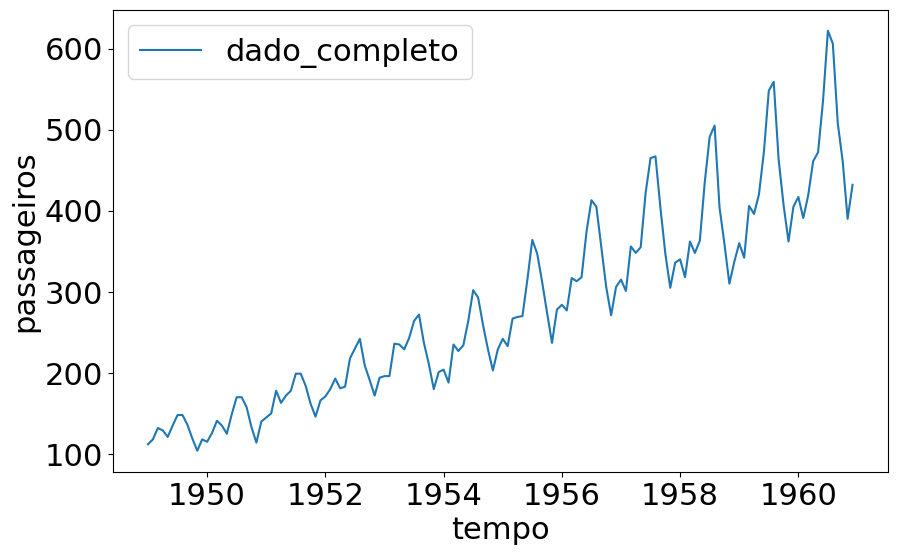

In [6]:
sns.lineplot(x='tempo',y='passageiros', data=passageiros,label='dado_completo') 

## Escalando os dados

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
sc.fit(passageiros)

StandardScaler()

In [10]:
dado_escalado = sc.transform(passageiros)

In [11]:
x=dado_escalado[:,0] #Features - Características - Tempo
y=dado_escalado[:,1] #Alvo - Número de passageiros

In [12]:
import matplotlib.pyplot as plt

/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Data')

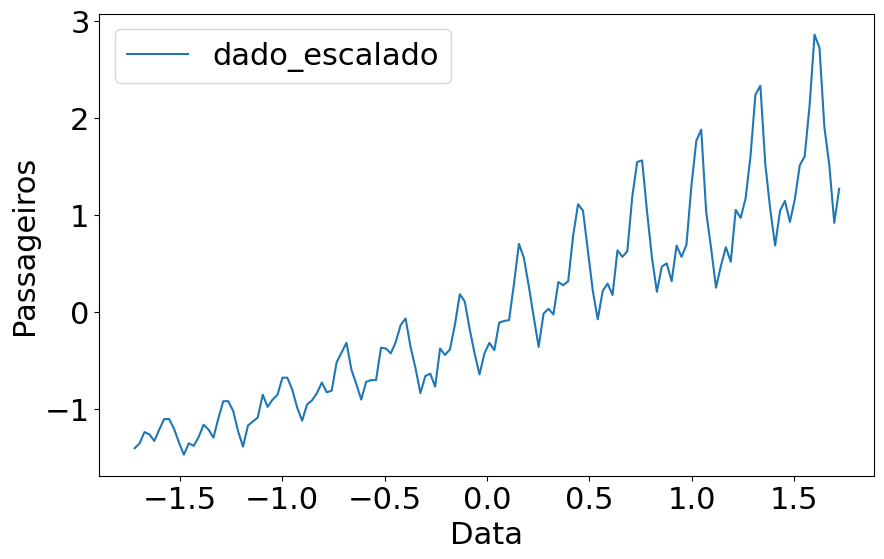

In [13]:
sns.lineplot(x=x,y=y,label='dado_escalado') 
plt.ylabel('Passageiros')
plt.xlabel('Data')

## Dividindo em treino e teste

In [14]:
tamanho_treino = int(len(passageiros)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(passageiros)-tamanho_treino #O resto vamos reservar para teste

In [15]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [16]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

<Axes: >

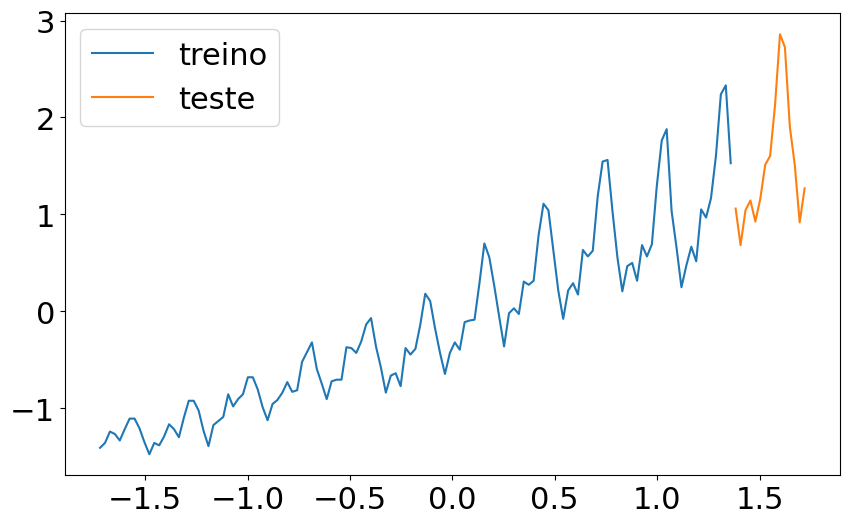

In [17]:
sns.lineplot(x=xtreino,y=ytreino,label='treino') 
sns.lineplot(x=xteste,y=yteste,label='teste') 

# Aula 2

## Regressão Linear

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-06-02 10:36:10.904452: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-02 10:36:11.008723: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 10:36:11.008745: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 10:36:11.028054: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-02 10:36:11.061788: I tensorflow/core/platform/cpu_feature_guar

In [19]:
regressor = Sequential()

2024-06-02 10:36:13.532644: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-02 10:36:13.617675: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-02 10:36:13.624438: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [20]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', 
                    activation='linear',use_bias=False))

In [21]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 1s 1ms/step - loss: 0.1284


2024-06-02 10:36:14.526882: I external/local_xla/xla/service/service.cc:168] XLA service 0x7be6f0de7e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-02 10:36:14.526899: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-06-02 10:36:14.546048: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-02 10:36:14.586689: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1717335374.652115    8370 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [24]:
y_predict= regressor.predict(xtreino) #Prevendo os dados de treino (o ajuste)

5/5 [==============================] - 0s 544us/step


/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

<Axes: >

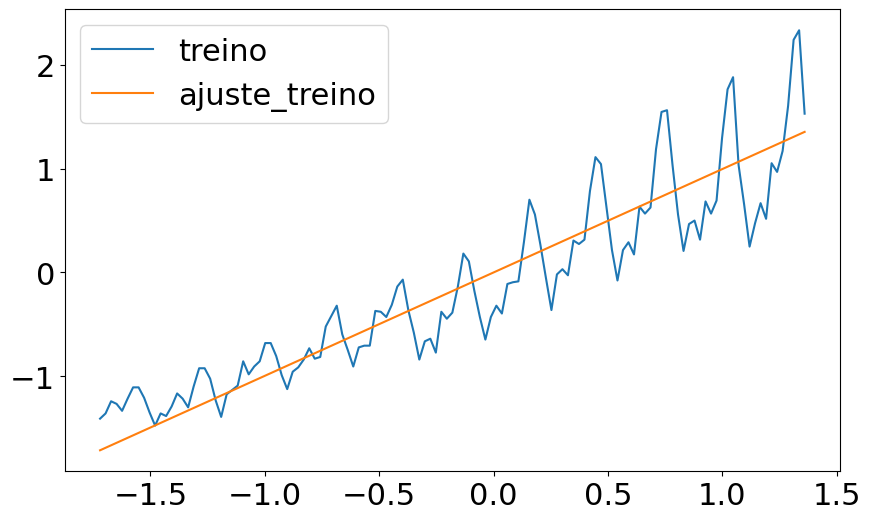

In [25]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [26]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

In [27]:
resultados

,tempo,passageiros
0,-1.720064,-1.712342
1,-1.696007,-1.688393
2,-1.671950,-1.664444
3,-1.647894,-1.640495
4,-1.623837,-1.616546
...,...,...
124,1.262984,1.257314
125,1.287041,1.281263
126,1.311098,1.305212
127,1.335155,1.329160


In [28]:
resultado_transf = sc.inverse_transform(resultados)

In [29]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

<Axes: xlabel='tempo', ylabel='passageiros'>

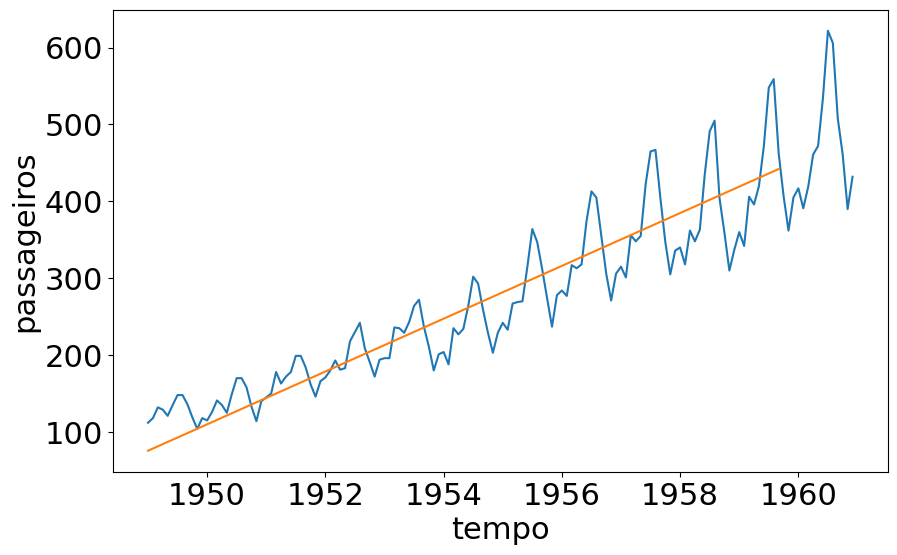

In [30]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)

In [31]:
y_predict_teste= regressor.predict(xteste) #Prevendo os dados de teste(o futuro)

1/1 [==============================] - 0s 16ms/step


In [32]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [33]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [34]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

<Axes: xlabel='tempo', ylabel='passageiros'>

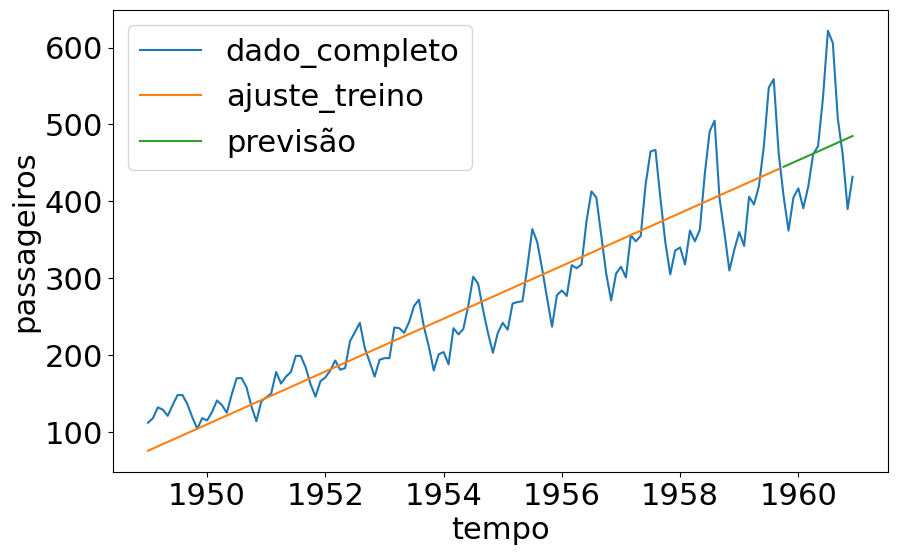

In [35]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros,label='dado_completo')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_teste,label='previsão')

## Regressão não-linear

In [36]:
regressor2 = Sequential()

In [37]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False)) 
regressor2.add(Dense(8, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', 
                     activation='linear',use_bias=False))

In [38]:
regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
regressor2.fit(xtreino,ytreino,epochs =500)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8293
Epoch 2/500
5/5 [==============================] - 0s 905us/step - loss: 0.8206
Epoch 3/500
5/5 [==============================] - 0s 917us/step - loss: 0.8159
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8102
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8065
Epoch 6/500
5/5 [==============================] - 0s 973us/step - loss: 0.8052
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8051
Epoch 8/500
5/5 [==============================] - 0s 894us/step - loss: 0.8046
Epoch 9/500
5/5 [==============================] - 0s 935us/step - loss: 0.8031
Epoch 10/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8017
Epoch 11/500
5/5 [==============================] - 0s 902us/step - loss: 0.7995
Epoch 12/500
5/5 [==============================] - 0s 925us/step - loss: 0.7973
Epoch 13/500
5/5 [=============================

In [40]:
y_predict= regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)

5/5 [==============================] - 0s 634us/step


In [41]:
y_predict_teste= regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

1/1 [==============================] - 0s 19ms/step


/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

<Axes: >

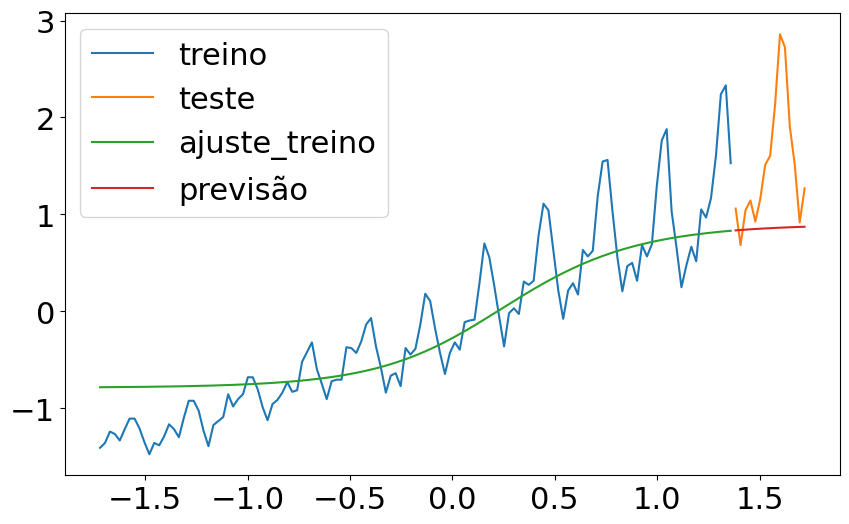

In [42]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

# Aula 3

## Alterando a forma como passamos os dados

Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo. 

In [43]:
vetor = pd.DataFrame(ytreino)[0]

In [44]:
import numpy as np

In [45]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [46]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [47]:
xtreino_novo[0:5] #X

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [48]:
ytreino_novo[0:5] #y

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

## Agora vamos separar o teste

In [49]:
vetor2 = pd.DataFrame(yteste)[0]

In [50]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

## Voltando para as redes neurais

In [51]:
regressor3 = Sequential()

In [52]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 1)                 64        
                                                                 
Total params: 584 (2.28 KB)
Trainable params: 584 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7899
Epoch 2/100
4/4 [==============================] - 0s 787us/step - loss: 0.7507
Epoch 3/100
4/4 [==============================] - 0s 890us/step - loss: 0.7209
Epoch 4/100
4/4 [==============================] - 0s 901us/step - loss: 0.7017
Epoch 5/100
4/4 [==============================] - 0s 791us/step - loss: 0.6759
Epoch 6/100
4/4 [==============================] - 0s 736us/step - loss: 0.6512
Epoch 7/100
4/4 [==============================] - 0s 762us/step - loss: 0.6240
Epoch 8/100
4/4 [==============================] - 0s 904us/step - loss: 0.5967
Epoch 9/100
4/4 [==============================] - 0s 909us/step - loss: 0.5656
Epoch 10/100
4/4 [==============================] - 0s 810us/step - loss: 0.5327
Epoch 11/100
4/4 [==============================] - 0s 761us/step - loss: 0.4958
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4579
Epoch 13/100
4/4 [=======================

In [54]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 [==============================] - 0s 719us/step


/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

<Axes: xlabel='tempo', ylabel='0'>

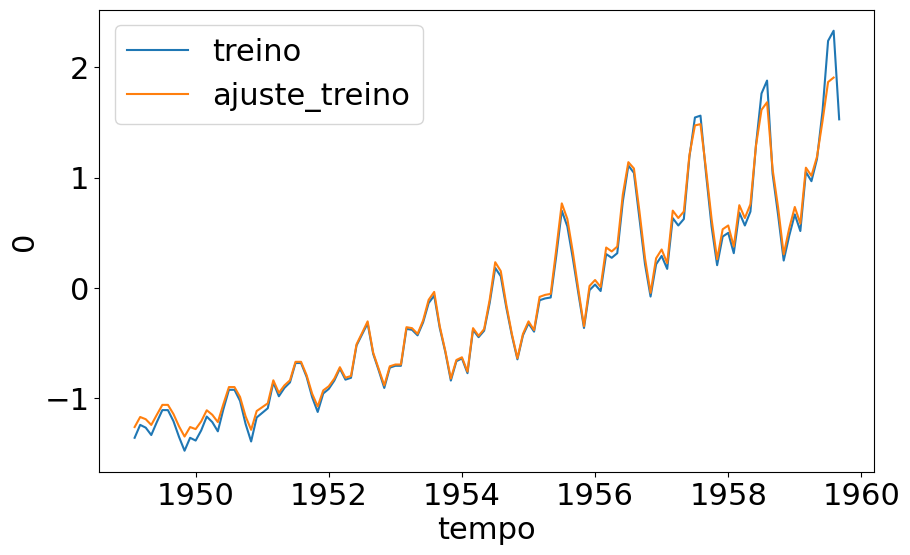

In [55]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [56]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 28ms/step


In [57]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

<Axes: xlabel='tempo', ylabel='0'>

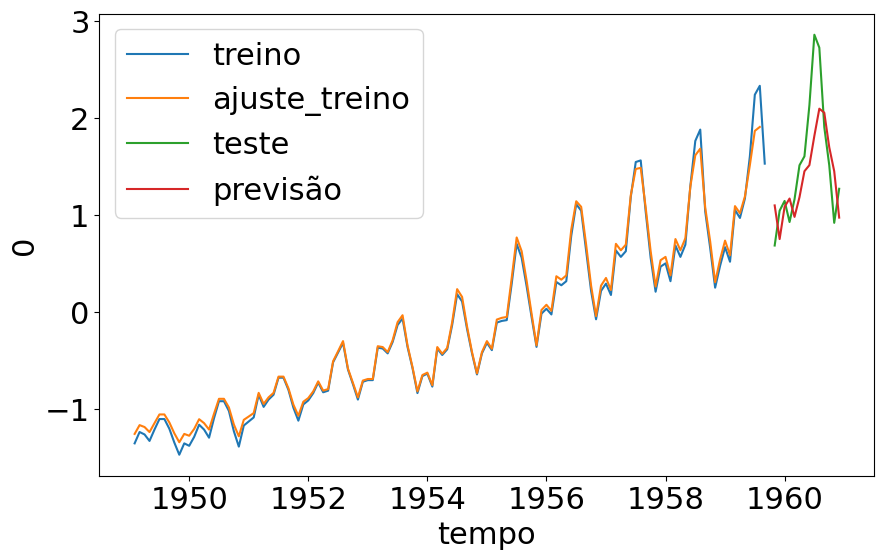

In [58]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

## Janelas

In [59]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [60]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [61]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [62]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [63]:
regressor4 = Sequential()

In [64]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 32        
                                                                 
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
Total params: 608 (2.38 KB)
Trainable params: 608 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7972
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7657
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7602
Epoch 4/300
4/4 [==============================] - 0s 934us/step - loss: 0.7594
Epoch 5/300
4/4 [==============================] - 0s 973us/step - loss: 0.7569
Epoch 6/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7539
Epoch 7/300
4/4 [==============================] - 0s 900us/step - loss: 0.7467
Epoch 8/300
4/4 [==============================] - 0s 904us/step - loss: 0.7412
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7352
Epoch 10/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7274
Epoch 11/300
4/4 [==============================] - 0s 854us/step - loss: 0.7183
Epoch 12/300
4/4 [==============================] - 0s 904us/step - loss: 0.7071
Epoch 13/300
4/4 [==============================]

In [66]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 29ms/step


In [67]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

<Axes: xlabel='tempo', ylabel='0'>

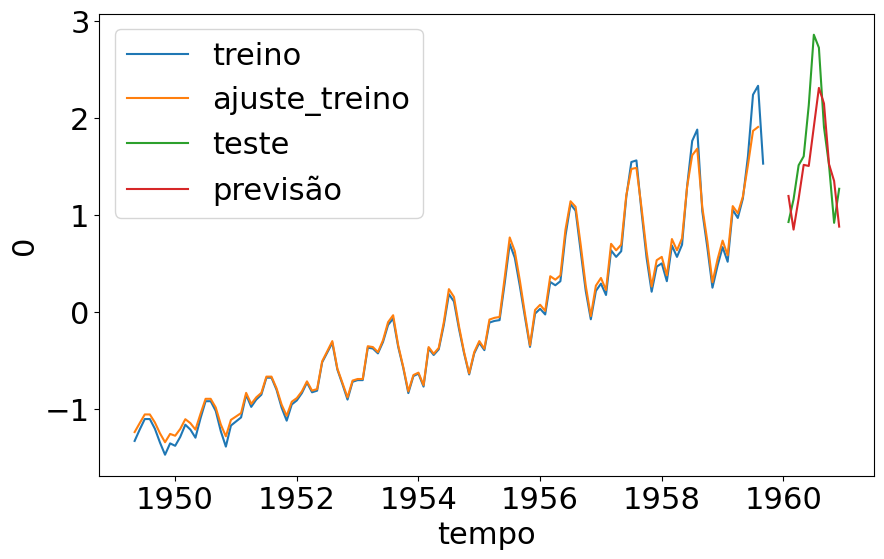

In [68]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

# Aula 4

## LSTMs

In [69]:
#Nova base de dados

In [70]:
bike = pd.read_csv('./bicicletas.csv')

In [71]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [72]:
bike['datas'] = pd.to_datetime(bike['datas'])

/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

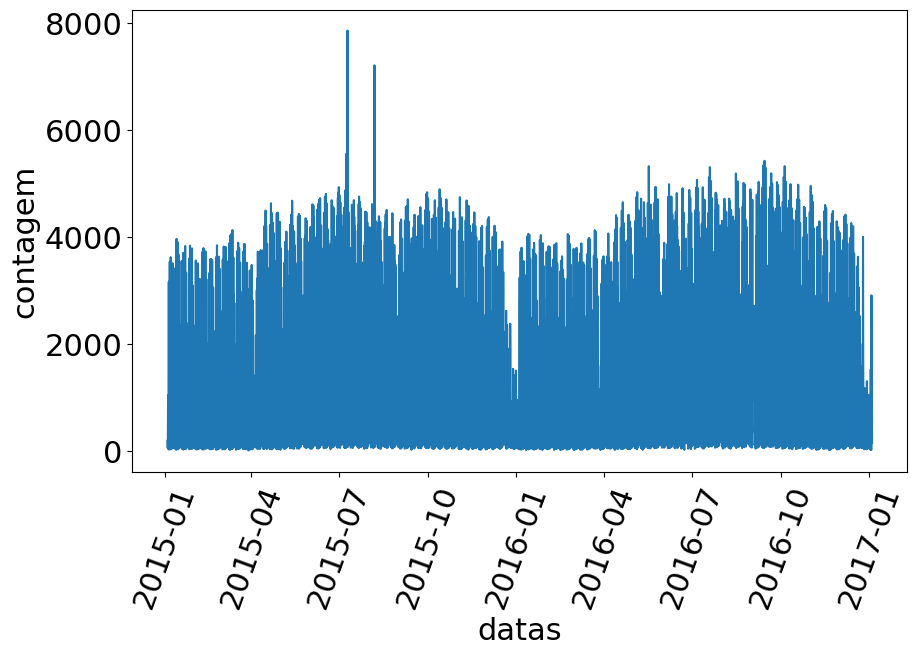

In [73]:
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=70)

## Escalando os dados

In [74]:
sc2 = StandardScaler()

In [75]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [76]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

## Dividindo em treino e teste

In [77]:
tamanho_treino = int(len(bike)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(bike)-tamanho_treino #O resto vamos reservar para teste

In [78]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

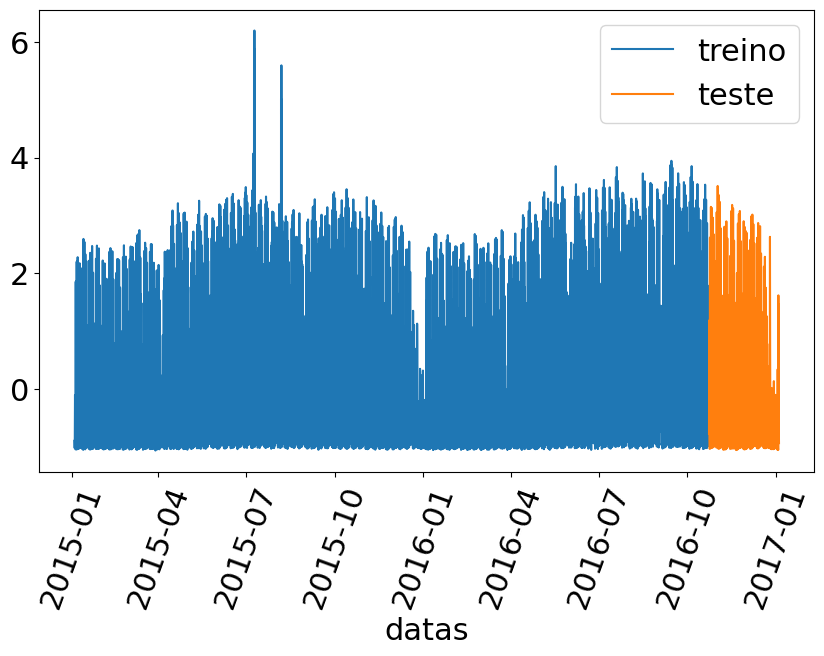

In [79]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino') 
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
plt.xticks(rotation=70) 

In [80]:
vetor = pd.DataFrame(ytreino)[0]

In [81]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [82]:
xtreino_novo[0:5]

array([[-0.88574518, -0.9262953 , -0.92998167, -0.98712048, -1.01016032,
        -1.01108192, -1.00647395, -0.9843557 , -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, -1.01016032, -1.01108192,
        -1.00647395, -0.9843557 , -0.93274645, -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, -1.01108192, -1.00647395,
        -0.9843557 , -0.93274645, -0.77607553, -0.56687377, -0.38347663],
       [-0.98712048, -1.01016032, -1.01108192, -1.00647395, -0.9843557 ,
        -0.93274645, -0.77607553, -0.56687377, -0.38347663, -0.25906149],
       [-1.01016032, -1.01108192, -1.00647395, -0.9843557 , -0.93274645,
        -0.77607553, -0.56687377, -0.38347663, -0.25906149, -0.20929543]])

In [83]:
ytreino_novo[0:5]

array([-0.56687377, -0.38347663, -0.25906149, -0.20929543, -0.09593941])

In [84]:
vetor2 = pd.DataFrame(yteste)[0]

In [85]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

## O que a LSTM espera

A entrada de redes recorrentes deve possuir a seguinte forma para a entrada (número de amostras, número de passos no tempo, e número de atributos por passo no tempo).

In [86]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [87]:
xtreino_novo.shape

(15662, 10, 1)

In [88]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

## Usando a LSTM

In [89]:
from tensorflow.keras.layers import LSTM

In [90]:
recorrente = Sequential()

In [91]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))

In [92]:
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 2s 2ms/step - loss: 0.2963 - val_loss: 0.0816
Epoch 2/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0842 - val_loss: 0.0416
Epoch 3/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0573 - val_loss: 0.0366
Epoch 4/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0484 - val_loss: 0.0288
Epoch 5/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0444 - val_loss: 0.0272
Epoch 6/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0409 - val_loss: 0.0245
Epoch 7/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0387 - val_loss: 0.0281
Epoch 8/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0368 - val_loss: 0.0534
Epoch 9/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0355 - val_loss: 0.0327
Epoch 10/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0340 - val_lo

In [94]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 0s 568us/step


/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

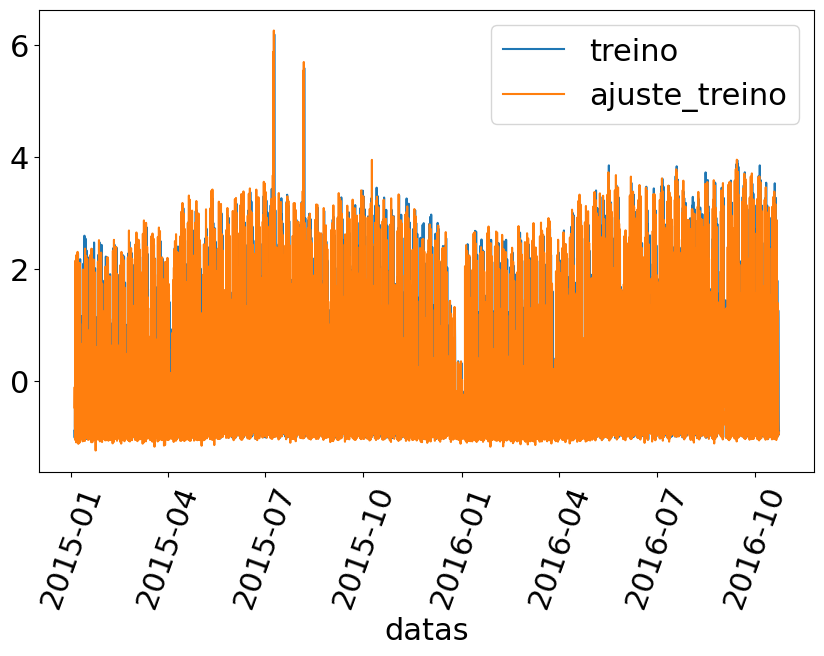

In [95]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70) 

In [96]:
y_predito = recorrente.predict(xteste_novo)

55/55 [==============================] - 0s 634us/step


/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

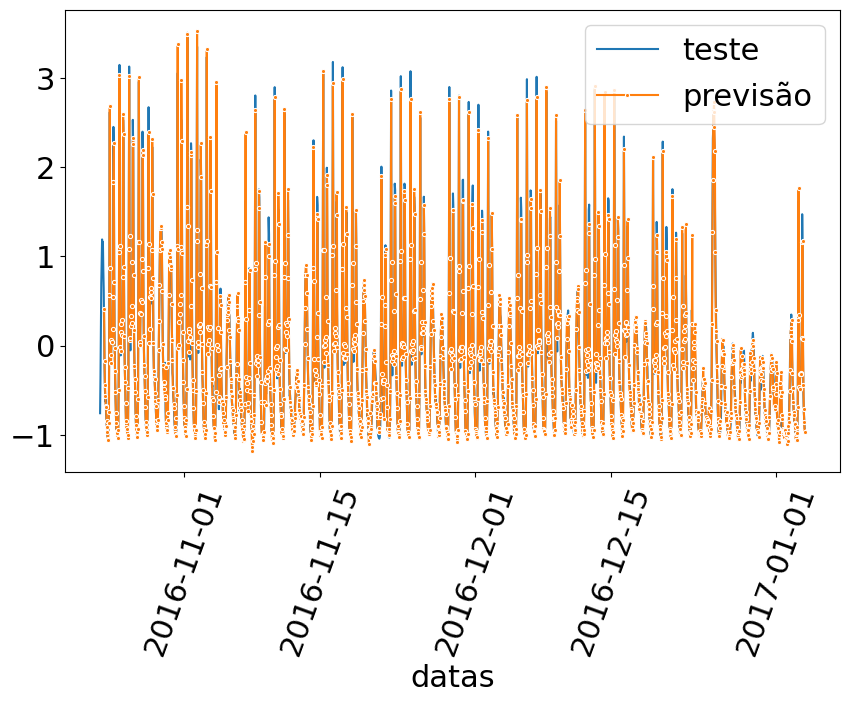

In [97]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70) 

# Aula 5

In [98]:
from tensorflow.keras.layers import GRU

In [99]:
recorrente_g = Sequential()

In [100]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units=1))

In [101]:
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50433 (197.00 KB)
Trainable params: 50433 (197.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 2s 2ms/step - loss: 0.2314 - val_loss: 0.0622
Epoch 2/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0716 - val_loss: 0.0399
Epoch 3/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0527 - val_loss: 0.0312
Epoch 4/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0444 - val_loss: 0.0333
Epoch 5/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0404 - val_loss: 0.0265
Epoch 6/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0372 - val_loss: 0.0364
Epoch 7/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0349 - val_loss: 0.0237
Epoch 8/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0338 - val_loss: 0.0310
Epoch 9/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0329 - val_loss: 0.0219
Epoch 10/100
490/490 [==============================] - 1s 1ms/step - loss: 0.0322 - val_lo

In [103]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 0s 593us/step


/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcelo/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

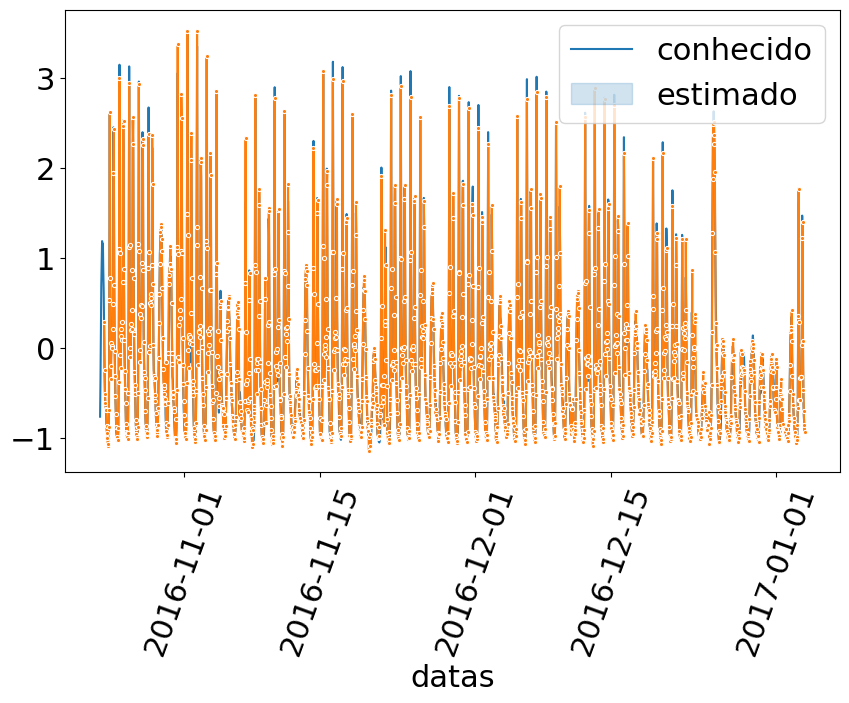

In [104]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70) 

In [105]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


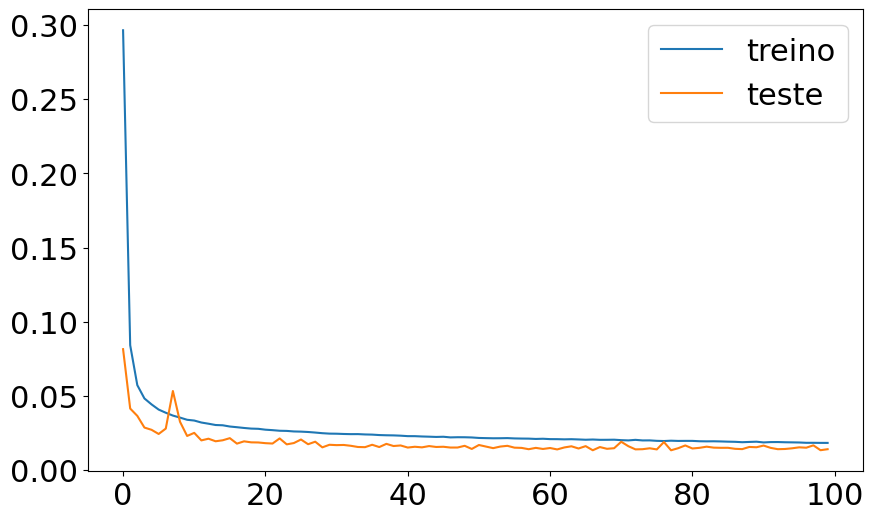

In [106]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

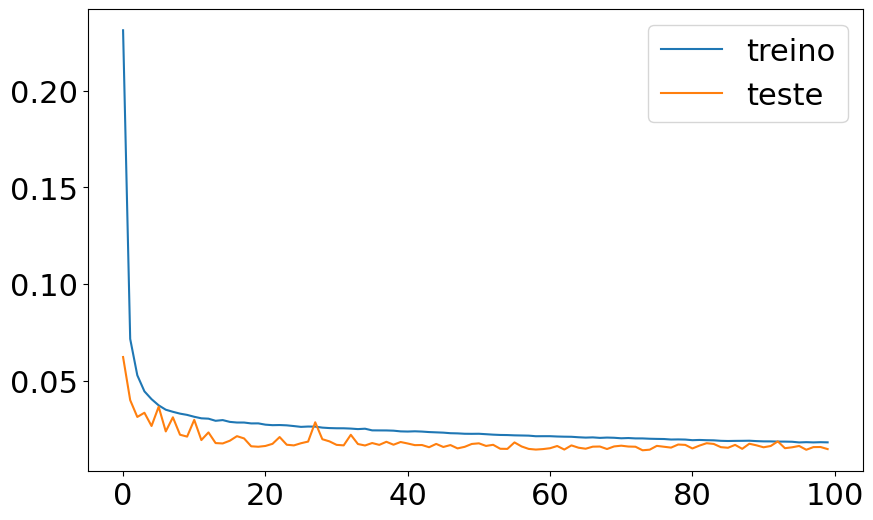

In [107]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
